<hr/>

# Data Mining  [EN.550.636.02]

03/30/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **Decision Tree**
- **Random Forest**
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [3]:
iris = datasets.load_iris()

In [4]:
# 4 features in total
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 3 class each with 50 observation
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

<h2><font color="darkblue">Decision Tree</font></h2>
<hr/>

- **Intuition:** Look for the best split for the data

<img src='files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

- **Classification criteria:** At a given node with dataset $D$ we want to find the best split $ \quad \theta = (\text{feature} \  j, \text{threshold} \  t) \quad $ to minimize impurity
> $ \displaystyle I(\theta) = \frac{n_{\text{left}}}{n}\, H \left(D_{\text{left}}(\theta) \right) + \frac{n_{\text{right}}}{n}\, H \left(D_{\text{right}}(\theta) \right) $

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=4)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

<img src='files/iris.png' width=800 align=center>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

In [7]:
clf.tree_.impurity

array([ 0.66666667,  0.        ,  0.5       ,  0.16803841,  0.04079861,
        0.        ,  0.        ,  0.44444444,  0.        ,  0.44444444,
        0.        ,  0.        ,  0.04253308,  0.44444444,  0.        ,
        0.        ,  0.        ])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# -2 means leaf
clf.tree_.feature

array([ 2, -2,  3,  2,  3, -2, -2,  3, -2,  0, -2, -2,  2,  1, -2, -2, -2])

In [10]:
# -2 means leaf
clf.tree_.threshold

array([ 2.45000005, -2.        ,  1.75      ,  4.94999981,  1.6500001 ,
       -2.        , -2.        ,  1.54999995, -2.        ,  6.94999981,
       -2.        , -2.        ,  4.85000038,  3.0999999 , -2.        ,
       -2.        , -2.        ])

In [11]:
# The higher, the more important the feature
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
# It is also known as the Gini importance
clf.feature_importances_

array([ 0.01333333,  0.01333333,  0.55072262,  0.42261071])

- **Note:** For `DecisionTreeClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- **Example**

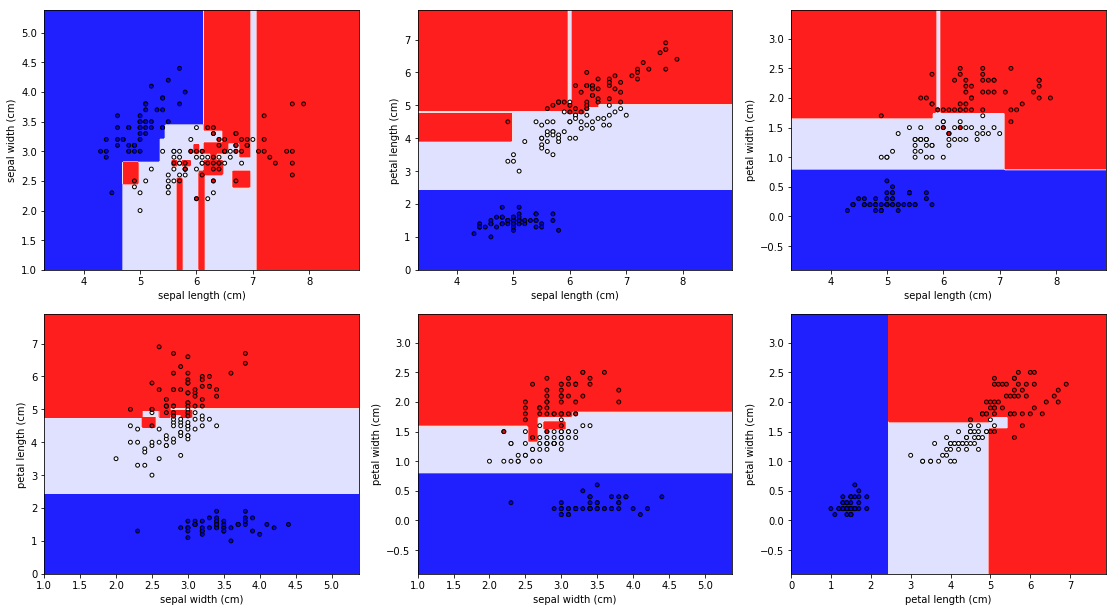

In [12]:
# Figure size
figure(figsize=(16, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # Only take two features each time
    X = iris.data[:, pair]
    y = iris.target

    # Train classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y);
    
    # Generate grid data
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    # Predict the class for grid data
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    subplot(2, 3, pairidx + 1);
    contourf(xx, yy, Z, cmap=cm.bwr);
    xlabel(iris.feature_names[pair[0]]);
    ylabel(iris.feature_names[pair[1]]);
    tight_layout(h_pad=1, w_pad=1, pad=2.5);

    # Plot the training points
    scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr, edgecolor='black', s=15);

<h2><font color="darkblue">Random Forest</font></h2>
<hr/>

- **Intuition:** Build multiple randomized trees and combine the result

In [13]:
clf = ensemble.RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='gini', max_depth=None, random_state=2018)
clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
clf.feature_importances_

array([ 0.05744432,  0.02029045,  0.54059988,  0.38166536])

- **Number of Tree**

In [16]:
# Save the result
result = pd.DataFrame()

# Try different number of tree
for n in range(10, 110, 10):
    start = datetime.datetime.now()
    clf = ensemble.RandomForestClassifier(n_estimators=n, random_state=n)
    clf.fit(iris.data, iris.target);
    time = datetime.datetime.now() - start
    cvscore = cross_val_score(clf, iris.data, iris.target, cv=10).mean()
    result = result.append(pd.DataFrame(data=[[n, cvscore, time]], columns=['Trees', 'Scores', 'Time']))

In [17]:
result

,Trees,Scores,Time
0,10,0.953333,00:00:00.019513
0,20,0.960000,00:00:00.028343
0,30,0.953333,00:00:00.045232
0,40,0.953333,00:00:00.060194
0,50,0.966667,00:00:00.065595
0,60,0.966667,00:00:00.075054
0,70,0.960000,00:00:00.090571
0,80,0.966667,00:00:00.106465
0,90,0.966667,00:00:00.121519
0,100,0.960000,00:00:00.135724


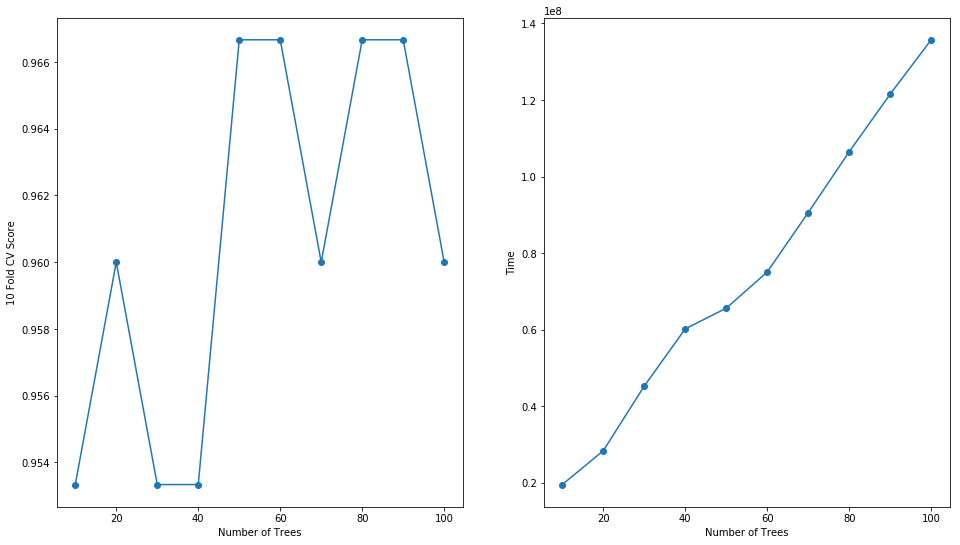

In [18]:
figure(figsize=(16, 9));
subplot(121);
plot(result.Trees, result.Scores, 'o-');
xlabel('Number of Trees');
ylabel('10 Fold CV Score');
subplot(122);
plot(result.Trees, result.Time, 'o-');
xlabel('Number of Trees');
ylabel('Time');

- **Example**

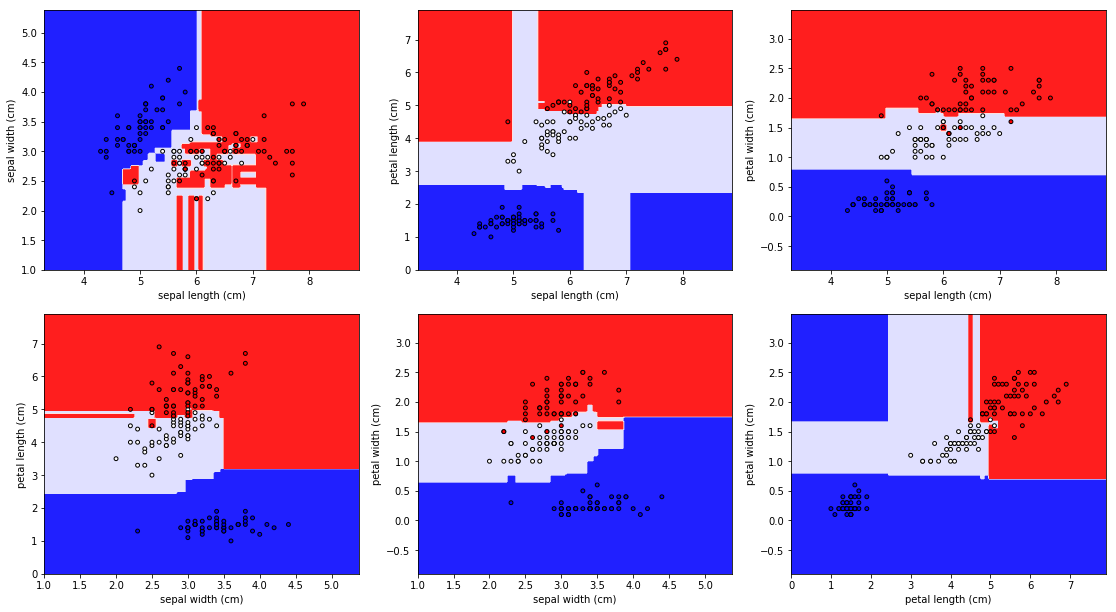

In [19]:
# Figure size
figure(figsize=(16, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # Only take two features each time
    X = iris.data[:, pair]
    y = iris.target

    # Train classifier
    clf = ensemble.RandomForestClassifier()
    clf.fit(X, y);
    
    # Generate grid data
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
    
    # Predict the class for grid data
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    subplot(2, 3, pairidx + 1);
    contourf(xx, yy, Z, cmap=cm.bwr);
    xlabel(iris.feature_names[pair[0]]);
    ylabel(iris.feature_names[pair[1]]);
    tight_layout(h_pad=1, w_pad=1, pad=2.5);

    # Plot the training points
    scatter(X[:,0], X[:,1], c=y, cmap=cm.bwr, edgecolor='black', s=15);